In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [8]:
a = np.array([0., 0.])
cov = np.array([[10., 8.], [8., 10.]])
rv = sts.multivariate_normal(a, cov)

### $ Построим \:график \:плотности\\двумерного \:нормального \:распределения$

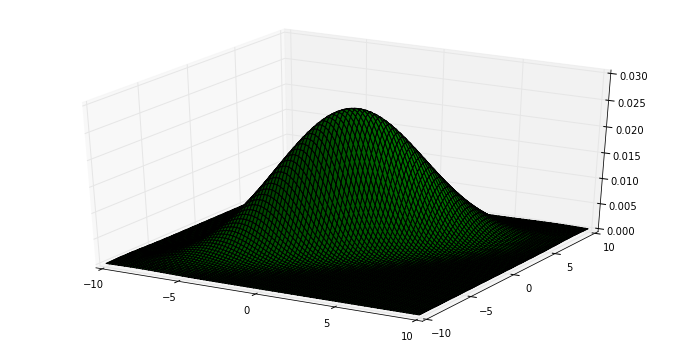

In [9]:
grid = np.mgrid[-10:10:.02, -10:10:.02]
data = [[rv.pdf((grid[0,i,j], grid[1,i,j])) 
             for i in range(grid[0].shape[0])] 
                 for j in range(grid[0].shape[1])]

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111, 
                     projection='3d')
trash = ax.plot_surface(grid[0], 
                        grid[1], 
                        data, 
                        color='g')


### $ Для \: у \in \{-3, 0, 1, 5\} \: построим \: графики \: f_{\xi_1|\xi_2}(x|y) $
### $ f_{\xi_1|\xi_2}(x|y) = \frac{f_{\xi_1,\xi_2}(x,y)}{f_{\xi_2}(y)} $
### $ f_{\xi_2}(y) = \int_{-\infty}^{+\infty} f_{\xi_1,\xi_2} (x,y) dx = \mathcal{N}(a_{1}, cov_{1, 1}).pdf(y)$



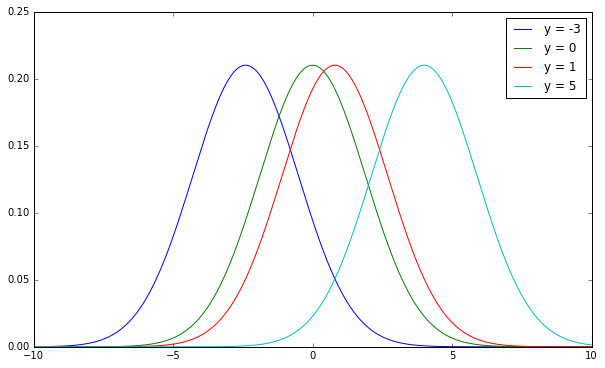

In [10]:
yrv = sts.norm(0, np.sqrt(10))

def f (x, y) :
    return rv.pdf([x,y]) / yrv.pdf(y)

plt.figure(figsize=(10,6))

for this_y in [-3, 0, 1, 5]:
    X = np.arange(-10, 10, .01)
    data = [f(x, this_y) for x in X]
    plt.plot(X, data, label="y = "+str(this_y))

trash = plt.legend()

## $Cov(5\cdot \xi_1-4\cdot \xi_2, \xi_2) =\\ 5\cdot Cov(\xi_1, \xi_2)-4\cdot Cov(\xi_2,\xi_2)=0$
## $5\xi_1-4\xi_2\ независимо\ с\ \xi_2$
## $E(\xi_1|\xi_2) = \frac{1}{5}\cdot E((5\cdot \xi_1-4\cdot \xi_2)\\ +4\cdot \xi_2|\xi_2) = \frac{1}{5}\cdot E(5\cdot \xi_1-4\cdot \xi_2)\\ + \frac{4}{5}\cdot \xi_2 = \frac{4}{5}\cdot \xi_2$

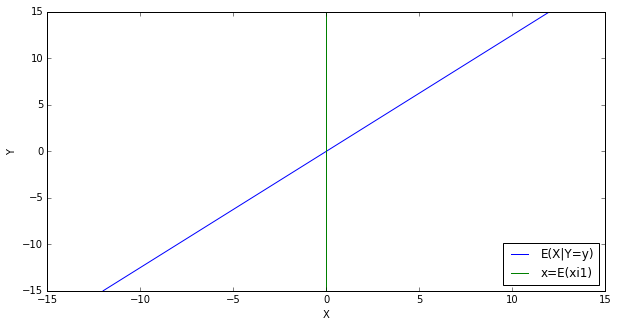

In [18]:
Y = np.arange(-15, 15, 0.1)
data = (4./5.)*Y
plt.figure(figsize=(10,5))
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(data, Y, label="E(X|Y=y)")
plt.plot(np.array([0.]*Y.shape[0]),
         Y, 
         label="x=E(xi1)")
trash = plt.legend(loc='lower right')

### Видим, что условное матожидание 
### и обычное - далеко не одно и то же 